In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Other imports for model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd

print('Imports successful')

Imports successful


In [5]:
# Load the data
df = pd.read_csv('../data/insurance_text_data.csv')

In [7]:
# Identifying Numeric and Categorical Columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(exclude=[np.number]).columns

# List columns with missing values
missing_numeric = df[numeric_columns].isnull().sum()
missing_categorical = df[categorical_columns].isnull().sum()

print("Numeric columns with missing values:")
print(missing_numeric[missing_numeric > 0])

print("\
Categorical columns with missing values:")
print(missing_categorical[missing_categorical > 0])



Numeric columns with missing values:
mmcode                         552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
NumberOfDoors                  552
CustomValueEstimate         779642
NumberOfVehiclesInFleet    1000098
dtype: int64
Categorical columns with missing values:
Bank                  145961
AccountType            40232
MaritalStatus           8259
Gender                  9536
VehicleType              552
make                     552
Model                    552
bodytype                 552
VehicleIntroDate         552
CapitalOutstanding         2
NewVehicle            153295
WrittenOff            641901
Rebuilt               641901
Converted             641901
CrossBorder           999400
dtype: int64


In [8]:
# Display the first few rows of numeric columns to inspect
print("\
First few rows of numeric columns:")
print(df[numeric_columns].head())

First few rows of numeric columns:
   UnderwrittenCoverID  PolicyID  PostalCode      mmcode  RegistrationYear  \
0               145249     12827        1459  44069150.0              2004   
1               145249     12827        1459  44069150.0              2004   
2               145249     12827        1459  44069150.0              2004   
3               145255     12827        1459  44069150.0              2004   
4               145255     12827        1459  44069150.0              2004   

   Cylinders  cubiccapacity  kilowatts  NumberOfDoors  CustomValueEstimate  \
0        6.0         2597.0      130.0            4.0             119300.0   
1        6.0         2597.0      130.0            4.0             119300.0   
2        6.0         2597.0      130.0            4.0             119300.0   
3        6.0         2597.0      130.0            4.0             119300.0   
4        6.0         2597.0      130.0            4.0             119300.0   

   NumberOfVehiclesInFleet 

### Handling Missing Data

In [10]:
# Separate numerical and categorical columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns] .fillna(0)
categorical_columns = df.select_dtypes(exclude=[np.number]).columns

# Impute missing values for numeric columns using mean
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

# Impute missing values for categorical columns using the most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

print("Missing data handled.")


Missing data handled.


### Feature Engineering

In [11]:
# Assuming the current year is 2024
df['VehicleAge'] = 2024 - df['RegistrationYear']

# Create a new feature: PremiumPerClaim (adding 1 to avoid division by zero)
df['PremiumPerClaim'] = df['TotalPremium'] / (df['TotalClaims'] + 1)

print("Feature engineering completed.")


Feature engineering completed.


### Encoding Categorical Data

In [13]:
from sklearn.preprocessing import LabelEncoder

# Convert all categorical columns to strings to ensure uniformity
df[categorical_columns] = df[categorical_columns].astype(str)

# Initialize label encoder
le = LabelEncoder()

# Apply label encoding to categorical columns
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

print("Categorical variables encoded.")

Categorical variables encoded.


### Train-Test Split

In [14]:
from sklearn.model_selection import train_test_split

# Define the target variables
X = df.drop(['TotalPremium', 'TotalClaims'], axis=1)
y_premium = df['TotalPremium']
y_claims = df['TotalClaims']

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_premium_train, y_premium_test, y_claims_train, y_claims_test = train_test_split(
    X, y_premium, y_claims, test_size=0.2, random_state=42
)

print("Train-test split completed.")
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Train-test split completed.
Training set size: 800078
Test set size: 200020


### Model Building

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split data into features (X) and target (y)
X = df.drop(['TotalPremium', 'TotalClaims'], axis=1)
y_premium = df['TotalPremium']
y_claims = df['TotalClaims']

# Split data into training and test sets (80:20 ratio)
X_train, X_test, y_premium_train, y_premium_test, y_claims_train, y_claims_test = train_test_split(
    X, y_premium, y_claims, test_size=0.2, random_state=42)

### Model 1: Linear Regression
print("Training Linear Regression Model")
lr = LinearRegression()
lr.fit(X_train, y_premium_train)

# Predictions for TotalPremium
y_premium_pred_lr = lr.predict(X_test)
print("Linear Regression Metrics (Total Premium)")
print("MSE:", mean_squared_error(y_premium_test, y_premium_pred_lr))
print("R^2:", r2_score(y_premium_test, y_premium_pred_lr))

### Model 2: Random Forest Regressor
print("\nTraining Random Forest Model")
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_premium_train)

# Predictions for TotalPremium
y_premium_pred_rf = rf.predict(X_test)
print("Random Forest Metrics (Total Premium)")
print("MSE:", mean_squared_error(y_premium_test, y_premium_pred_rf))
print("R^2:", r2_score(y_premium_test, y_premium_pred_rf))

### Model 3: XGBoost Regressor
print("\nTraining XGBoost Model")
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_premium_train)

# Predictions for TotalPremium
y_premium_pred_xgb = xgb.predict(X_test)
print("XGBoost Metrics (Total Premium)")
print("MSE:", mean_squared_error(y_premium_test, y_premium_pred_xgb))
print("R^2:", r2_score(y_premium_test, y_premium_pred_xgb))

# Repeat the same process for `y_claims` if needed, following the same steps as above.

Training Linear Regression Model
Linear Regression Metrics (Total Premium)
MSE: 4269.137343074835
R^2: 0.8452548374512314

Training Random Forest Model
Random Forest Metrics (Total Premium)
MSE: 781.7004797425797
R^2: 0.9716653838746983

Training XGBoost Model
XGBoost Metrics (Total Premium)
MSE: 308.3593914000799
R^2: 0.9888227713678388


### Model Evaluation

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(y_test, y_pred, model_name):
    # Calculate regression evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print the results
    print(f"\n{model_name} Performance Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R² Score: {r2:.4f}")

# Linear Regression Evaluation
evaluate_model(y_premium_test, y_premium_pred_lr, "Linear Regression")

# Random Forest Evaluation
evaluate_model(y_premium_test, y_premium_pred_rf, "Random Forest")

# XGBoost Evaluation
evaluate_model(y_premium_test, y_premium_pred_xgb, "XGBoost")


Linear Regression Performance Metrics:
Mean Squared Error (MSE): 4269.1373
Root Mean Squared Error (RMSE): 65.3386
Mean Absolute Error (MAE): 15.4845
R² Score: 0.8453

Random Forest Performance Metrics:
Mean Squared Error (MSE): 781.7005
Root Mean Squared Error (RMSE): 27.9589
Mean Absolute Error (MAE): 0.1082
R² Score: 0.9717

XGBoost Performance Metrics:
Mean Squared Error (MSE): 308.3594
Root Mean Squared Error (RMSE): 17.5602
Mean Absolute Error (MAE): 1.7589
R² Score: 0.9888


### Random Forest Feature Importance

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Train-test split
X = df.drop(['TotalPremium', 'TotalClaims'], axis=1)  # Features
y = df['TotalPremium']  # Target variable (Total Premium)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"Random Forest RMSE: {rmse}")


Random Forest RMSE: 27.958906984046777


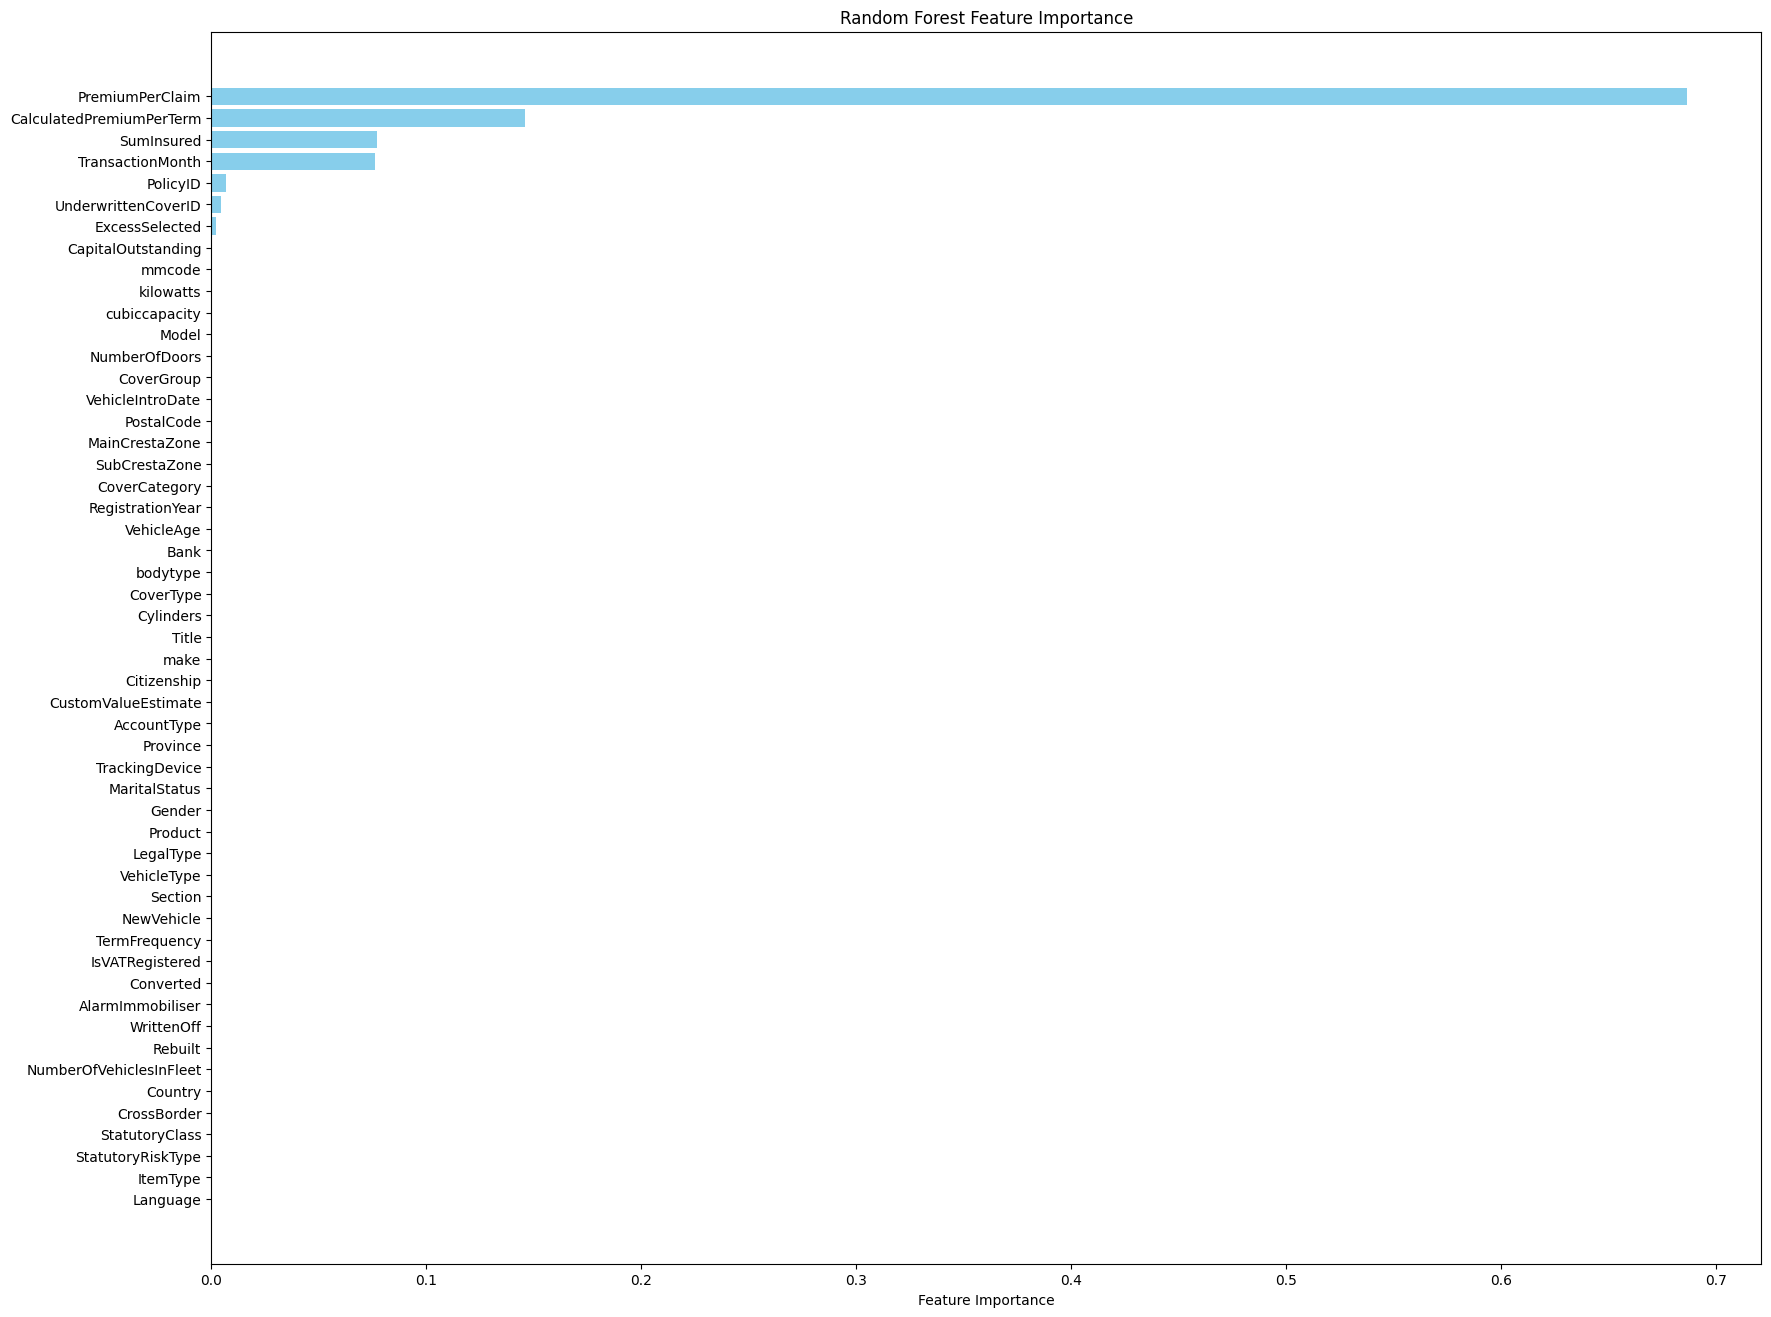

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances from the Random Forest model
importances_rf = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances_rf
})

# Sort features by importance
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(20, 16))
plt.barh(feature_importance_rf['Feature'], feature_importance_rf['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.show()